In [1]:
import pandas as pd

data = pd.read_csv('correos_to_data.csv', sep=",", header=None,encoding='latin-1')
data.columns = ["id","fecha","hora","id_sensor","version","letra","pm_25","pm_1","pm_10","delta_t","lon","lat","cal","comentario"]

data = data.drop_duplicates()

data.drop(data[data.version == 'hvhj'].index, inplace=True)
data.drop(data[data.version == 'prueba'].index, inplace=True)
data.drop(data[data.letra == 'pl'].index, inplace=True)
data.drop(7845, axis=0, inplace=True)

data.loc[data['version'] == 'megacaminsta', 'version'] = 'mega'
data.loc[data['version'] == 'megacaminata', 'version'] = 'mega'
data.loc[data['fecha'] == str('25-08-2022'), 'hora'] = data['hora']-2592000
data.loc[data['fecha'] == str('25-08-2022'), 'fecha'] = '26-07-2022'
data.loc[data['version'] == 'auto2', 'version'] = 'auto'

In [2]:
data.dtypes

id              int64
fecha          object
hora            int64
id_sensor      object
version        object
letra          object
pm_25           int64
pm_1            int64
pm_10           int64
delta_t         int64
lon           float64
lat           float64
cal            object
comentario     object
dtype: object

Podemos ver que en este documento se encuentran las caminatas de 

In [3]:
data2 = pd.read_csv('data1.txt', sep=",", header=0)
data2.loc[data2['id_sensor'] == "G08", 'hora'] = data2['hora']+3600

In [4]:
def tiempo(data):
    data['GMT'] = pd.to_datetime(data['hora'], unit="s")
    data['time_cl'] = pd.to_datetime(data['hora']-14400, unit="s")
    data['GMT'] = data.GMT.dt.round('10S')
    data['time_cl'] = data.time_cl.dt.round('10S')
    return data

In [5]:
def df_to_dict(data):
    fechas = (data["fecha"].unique().tolist())
    print (fechas)
    dfs_dates = dict()
    #creo que lo mas smart sería hacer un diccionario que tenga como llave el nombre df_blabla y el valor sea la df

    for date in fechas:  
        name = f"{date.replace('-','')}"
        dfs_dates[name] = data[data['fecha'] == date]
    return dfs_dates

In [6]:
def registro(dfs_dates):
    for x in dfs_dates:
        m = dfs_dates[x]
        print(f'En el día {dfs_dates[x]["fecha"].unique()} se tienen registros de caminatas en: {dfs_dates[x]["version"].unique().tolist()} con registros de los sensores {m["id_sensor"].unique().tolist()}')

In [7]:
#import matplotlib.pyplot as plt
#%matplotlib inline

#for x in dfs_dates:
#    print(x)
#    m = dfs_dates[x] #para facilitar el acceso a las df que están dentro de un diccionario
#    sensores = m["id_sensor"].unique().tolist() #lista con los lugares de ese día
#    sesiones = m["version"].unique().tolist() #lista con los lugares de ese día
#    letra = m["letra"].unique().tolist() #lista con los sensores de ese día
#    plt.figure()
#    for snsor in sensores:
#        print(snsor)
#        x= m[m['id_sensor']==snsor]
#        x=x[x['cal'] == 'calibracion']
#        plt.plot(x.time_cl,x.pm_25, label=snsor)
   #print('end')
#    plt.show()
        
    #m.plot(x="time_cl", y=["pm_25"])
    


In [8]:
#testing (no importante)
#waa =data[data['fecha']== str('26-07-2022')]
#waa.nsmallest(10,'time_cl')

In [9]:
#testing (no importante)
#for x in dfs_dates:
#    print(x)
#    m = dfs_dates[x] #para facilitar el acceso a las df que están dentro de un diccionario
#    sensores = m["id_sensor"].unique().tolist() #lista con los lugares de ese día
#    sesiones = m["version"].unique().tolist() #lista con los lugares de ese día
#    letra = m["letra"].unique().tolist() #lista con los sensores de ese día
    #plt.figure()
#    for csion in sesiones:
#        letra = m["letra"].unique().tolist()
#        print(csion)
#        for ltra in letra:
#            sensores = m["id_sensor"].unique().tolist()
#            print(ltra)
#            for snsor in sensores:
#                print(snsor)

In [10]:
def nameless(df_a):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (20,5)
    #recibe un df para separarlo
    #sensores = df_a["id_sensor"].unique().tolist() #lista con los sensores de ese día
    sesiones = df_a["version"].unique().tolist() #lista con los lugares de ese día
    #letra = df_a["letra"].unique().tolist() #lista con los sensores de ese día
    #plt.figure()

    for csion in sesiones:
        df_b=df_a[df_a['version']==csion]
        letra = df_b["letra"].unique().tolist()
        for ltra in letra:
            df_c = df_b[df_b['letra']==ltra]
            sensores = df_c["id_sensor"].unique().tolist() #lista con los sensores de ese día
            print(f'La version es {csion} en la letra {ltra}, con la participacion de los sensores {sensores}')
            #print(df_c)
            plt.figure()
            for snsor in sensores:
                x= df_c[df_c['id_sensor']==snsor]
                x=x[x['cal'] == 'calibracion']
                plt.plot(x.time_cl,x.pm_25, label=x.id_sensor.unique())
                plt.legend(loc="upper left")
                plt.ylabel("Material particulado en ")
            plt.show()
                
#plt.figure()
#plt.show()
#plt.plot(df_c.time_cl,df_c.pm_25, label=snsor)
    

In [11]:
def exportar(data) : 
    data.to_csv(f'{data}_hiri', sep=',')

In [12]:
#copia/variacion de mas arriba
def graficar(dfs_dates):
    for x in dfs_dates:
        print(x)
        m = dfs_dates[x] #para facilitar el acceso a las df que están dentro de un diccionario
        nameless(m)

['07-07-2022', '06-07-2022', '05-07-2022', '02-07-2022', '04-08-2022', '30-06-2022', '03-08-2022', '03-07-2022', '04-07-2022', '29-07-2022', '26-07-2022', '29-06-2022', '06-08-2022', '30-07-2022', '01-07-2022', '27-07-2022', '08-07-2022', '02-01-2015', '16-08-2022', '01-01-2015', '09-07-2022']
En el día ['07-07-2022'] se tienen registros de caminatas en: ['escuela', 'mega', 'casa'] con registros de los sensores ['G07', 'F01', 'G05', 'G01', 'G08', 'G06']
En el día ['06-07-2022'] se tienen registros de caminatas en: ['auto', 'plaza', 'auto1'] con registros de los sensores ['G08', 'G05', 'G07', 'F04', 'G06', 'F01', 'G02']
En el día ['05-07-2022'] se tienen registros de caminatas en: ['escuela'] con registros de los sensores ['F04', 'G07', 'G06', 'G05', 'G08', 'G02']
En el día ['02-07-2022'] se tienen registros de caminatas en: ['plaza', 'escuela'] con registros de los sensores ['G10', 'G05', 'G06', 'F04', 'G08', 'F01', 'G07']
En el día ['04-08-2022'] se tienen registros de caminatas en: [

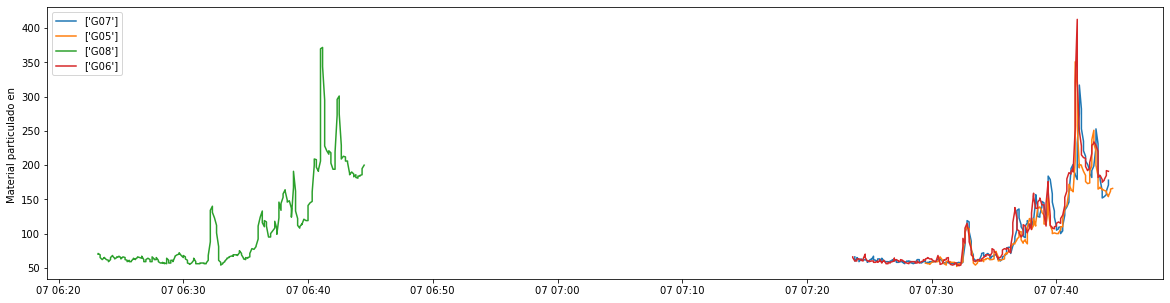

La version es mega en la letra b, con la participacion de los sensores ['F01', 'G05', 'G06']


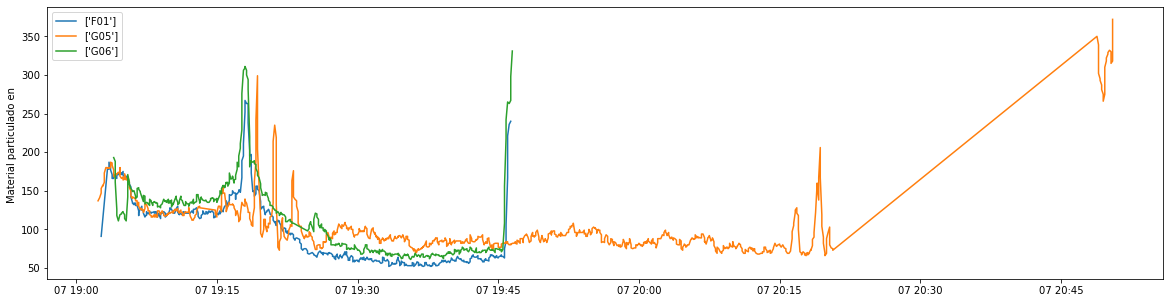

La version es casa en la letra 1, con la participacion de los sensores ['G01']


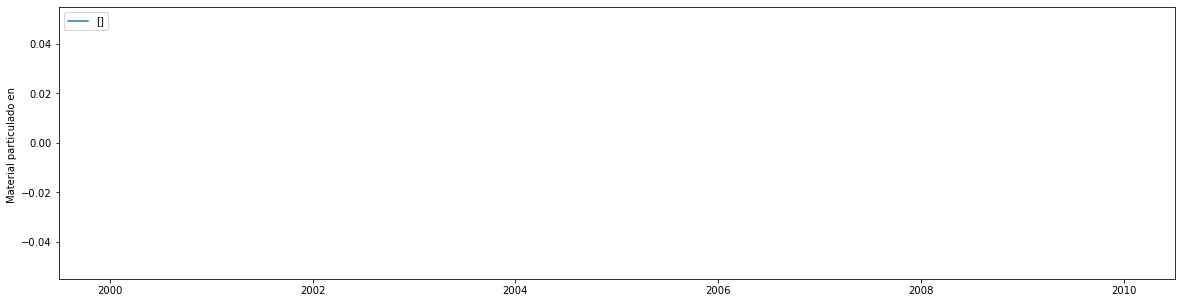

06072022
La version es auto en la letra e, con la participacion de los sensores ['G08', 'G05', 'G07']


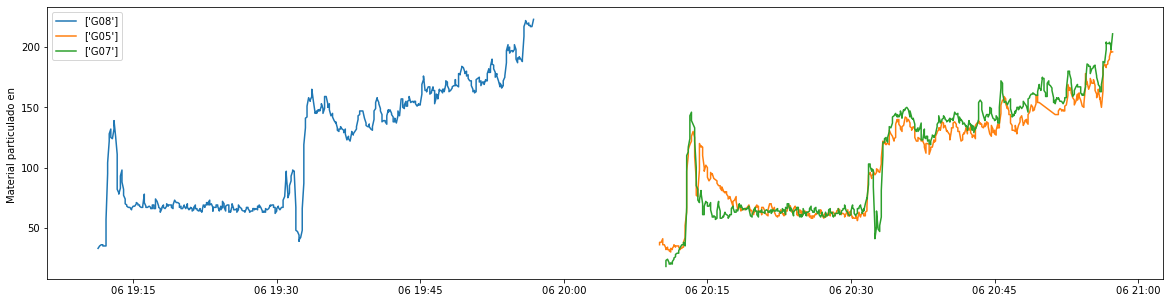

La version es plaza en la letra d, con la participacion de los sensores ['G07', 'F04', 'G08', 'G05']


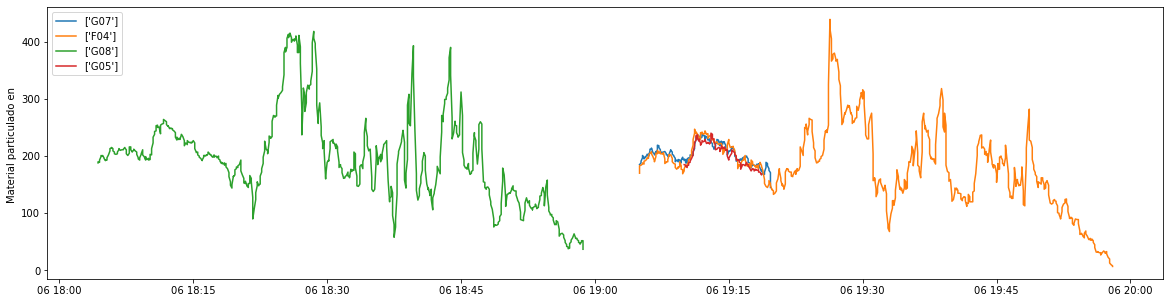

La version es plaza en la letra b, con la participacion de los sensores ['F04', 'F01', 'G08', 'G06', 'G07']


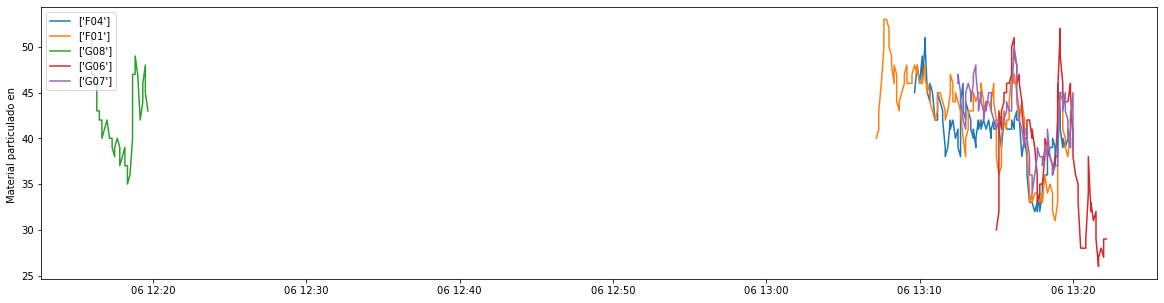

La version es plaza en la letra a, con la participacion de los sensores ['G08', 'G06', 'G02', 'G07']


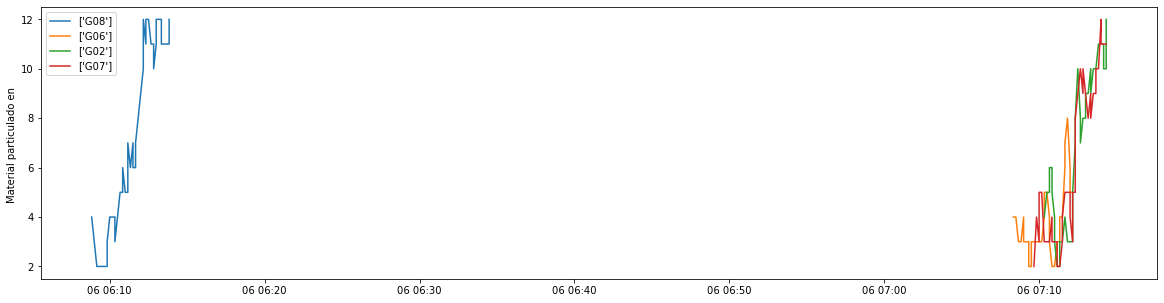

La version es auto1 en la letra e, con la participacion de los sensores ['F04']


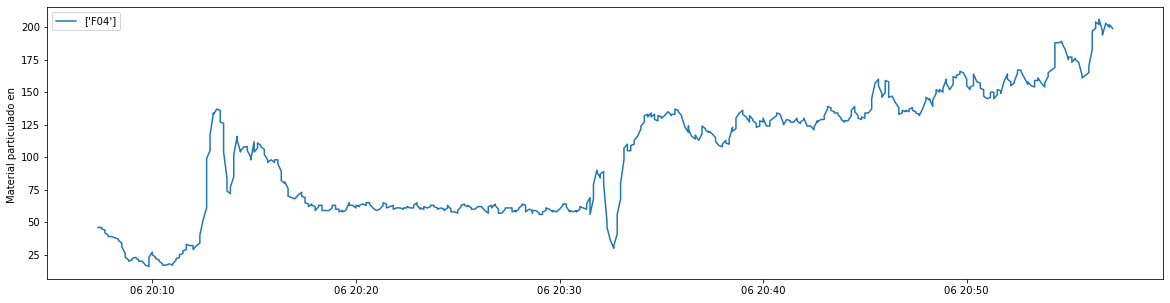

05072022
La version es escuela en la letra b, con la participacion de los sensores ['F04', 'G05', 'G07']


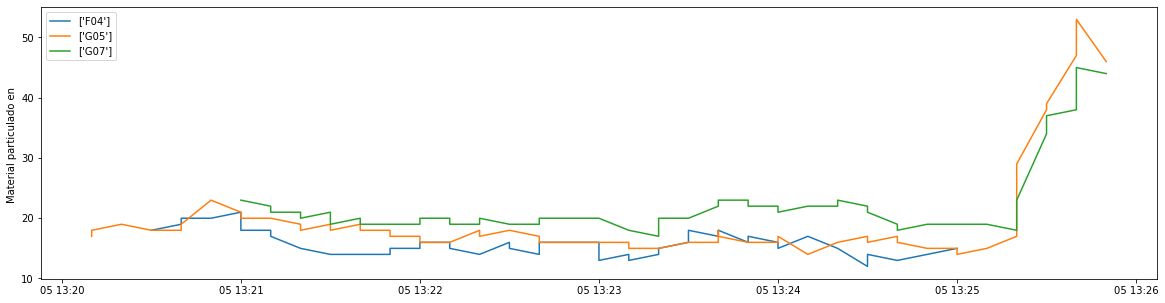

La version es escuela en la letra a, con la participacion de los sensores ['G07', 'G05', 'G02']


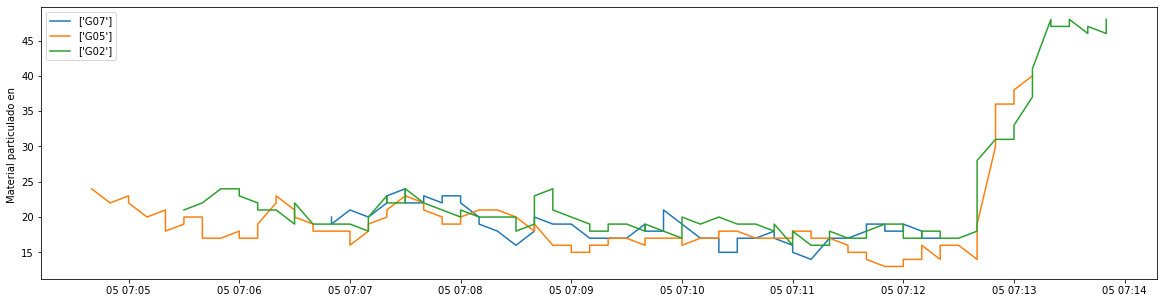

La version es escuela en la letra c, con la participacion de los sensores ['G07', 'G06', 'G05', 'G08', 'F04']


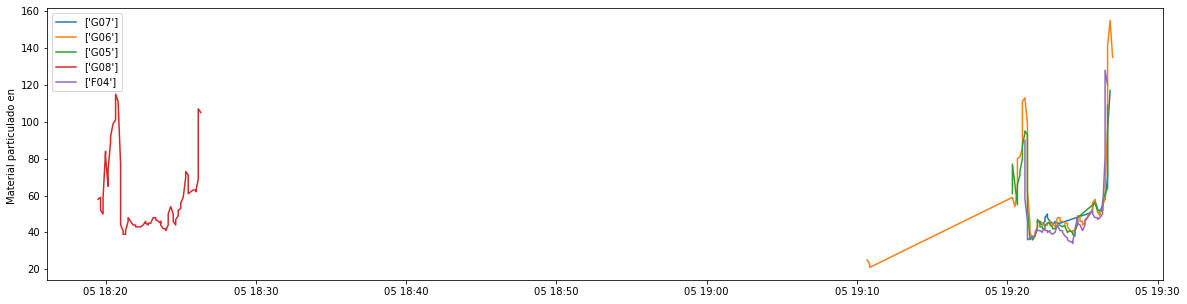

02072022
La version es plaza en la letra a, con la participacion de los sensores ['G10', 'G05', 'G06', 'F04', 'G08', 'F01']


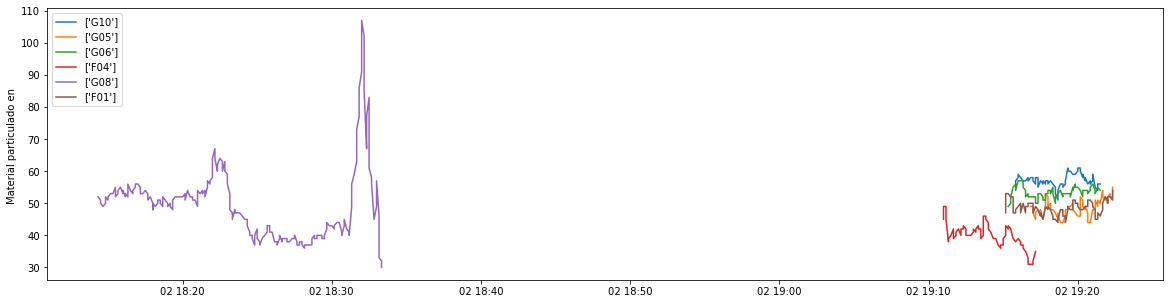

La version es escuela en la letra a, con la participacion de los sensores ['G07']


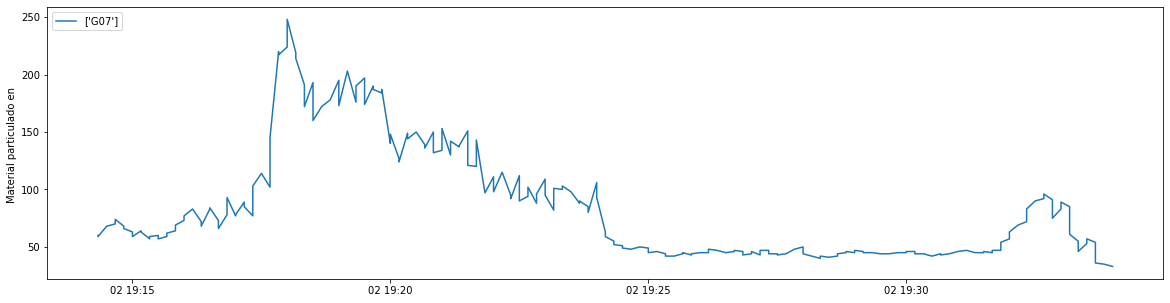

04082022
La version es quintero2 en la letra a, con la participacion de los sensores ['G02', 'G07', 'F01']


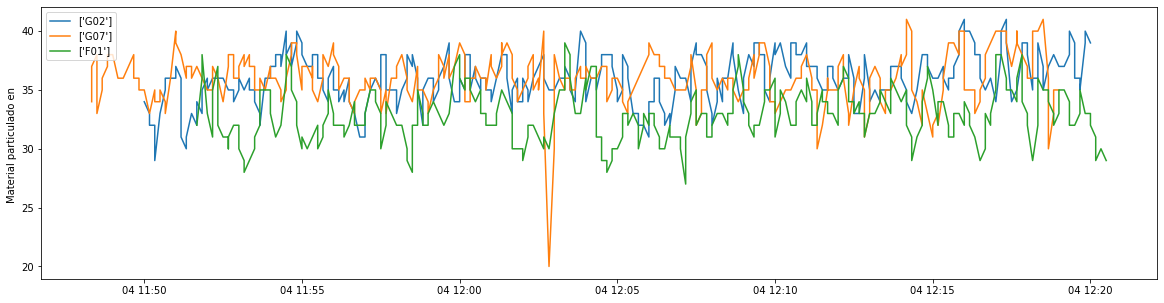

La version es quintero en la letra b, con la participacion de los sensores ['F01', 'G02']


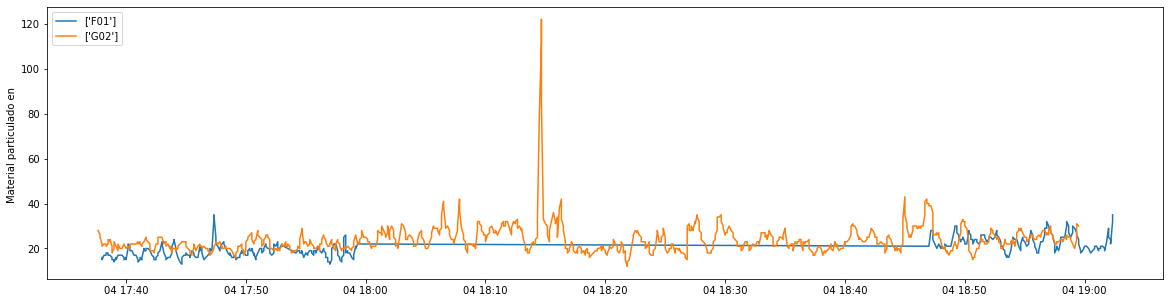

La version es quinteri en la letra b, con la participacion de los sensores ['G07']


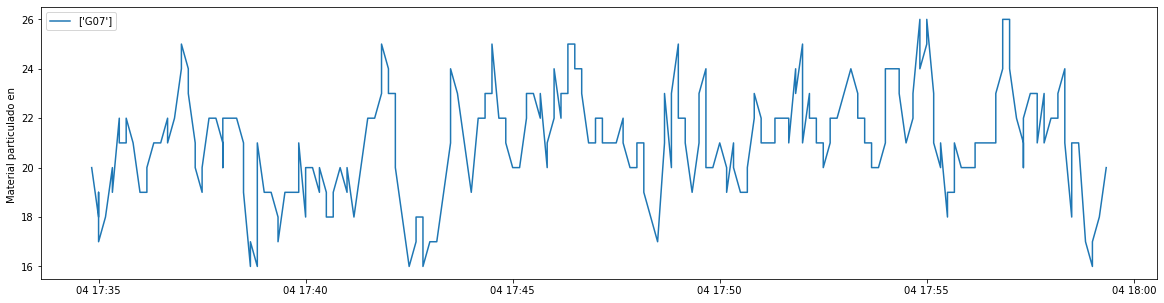

30062022
La version es plaza en la letra c, con la participacion de los sensores ['G08', 'G10', 'G09', 'G06']


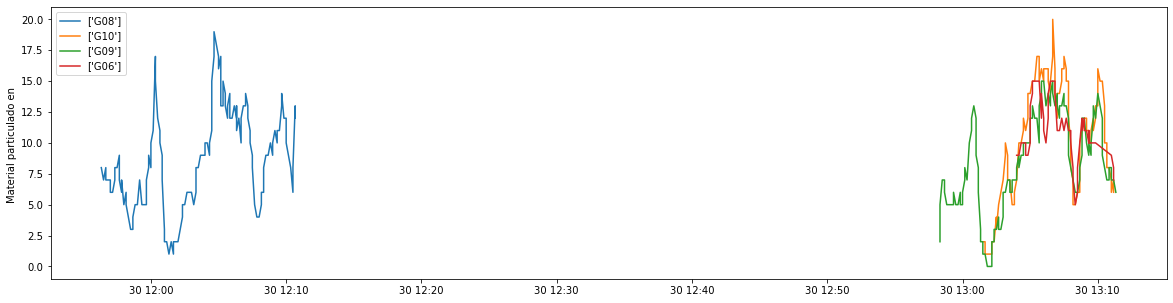

La version es plaza en la letra b, con la participacion de los sensores ['F01', 'G10', 'G05', 'G09', 'G08']


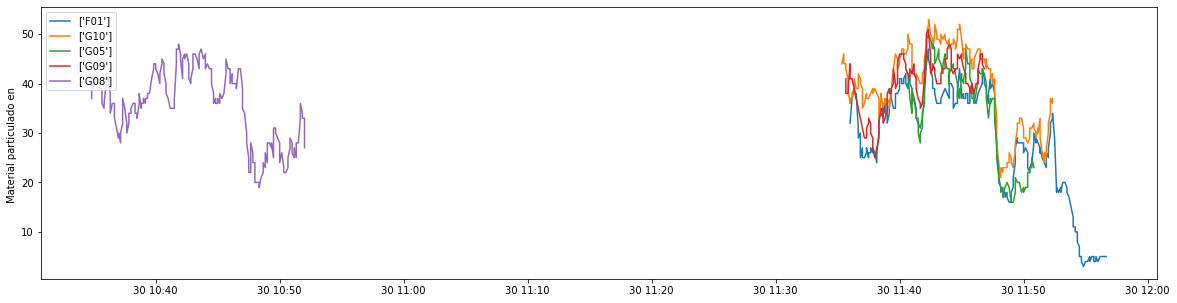

La version es mega en la letra a, con la participacion de los sensores ['F01', 'G09', 'G05', 'G10']


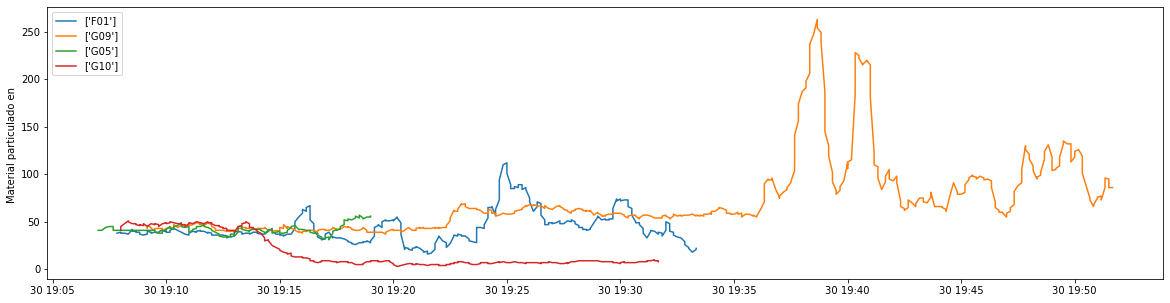

La version es escuela en la letra a, con la participacion de los sensores ['F02']


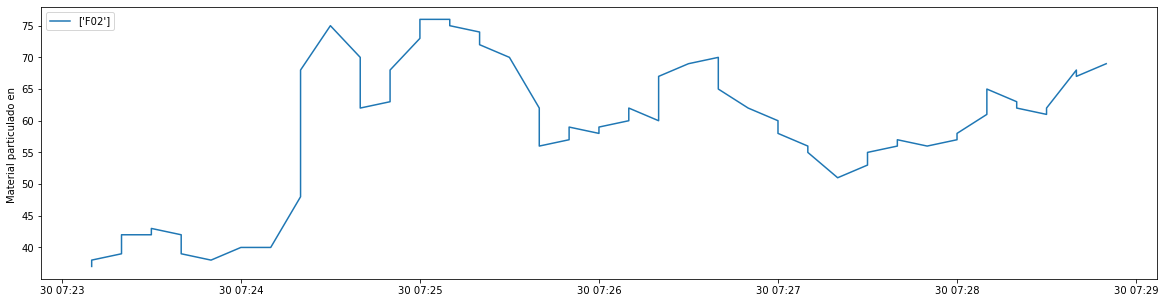

La version es Plaza en la letra B, con la participacion de los sensores ['G06']


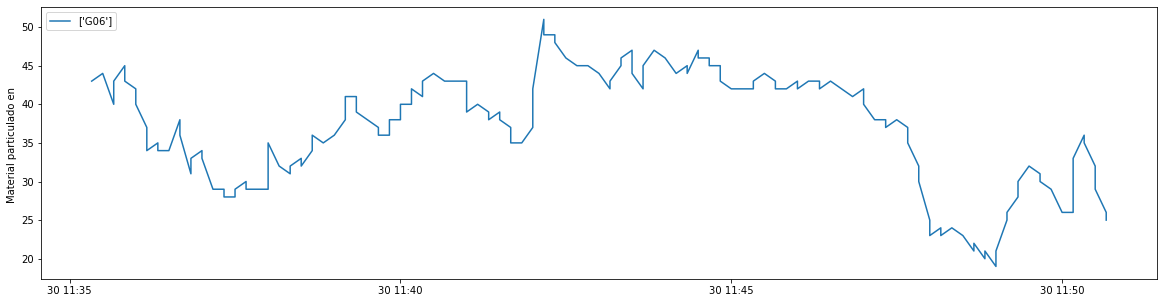

La version es Mega en la letra a, con la participacion de los sensores ['G06']


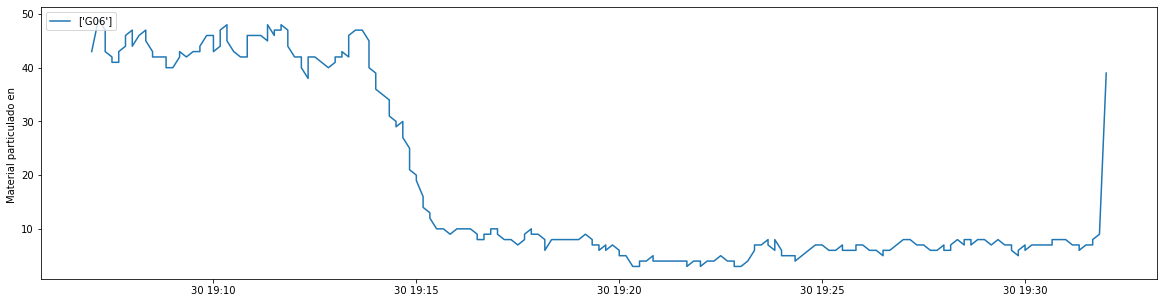

03082022
La version es quintero en la letra b, con la participacion de los sensores ['F01', 'G02', 'G07']


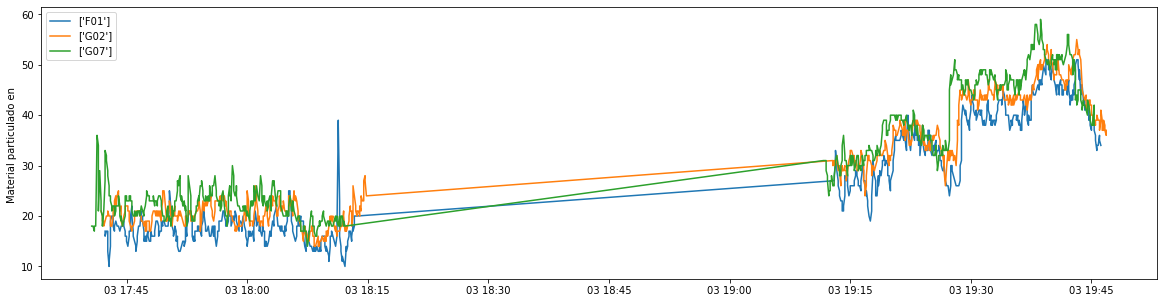

La version es quintero en la letra a, con la participacion de los sensores ['G07', 'F01']


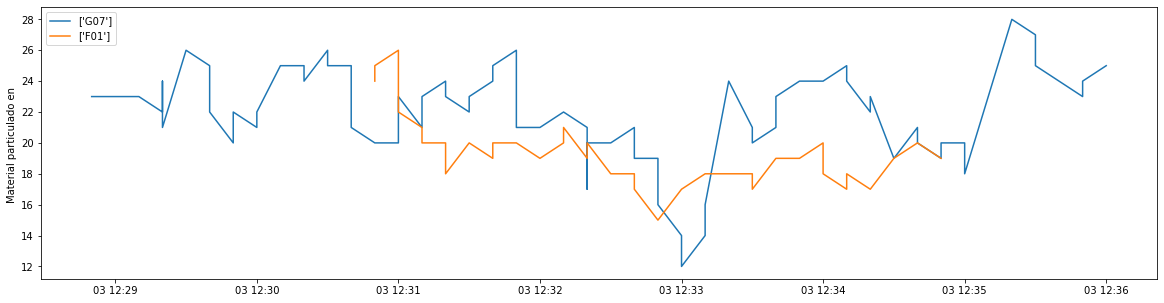

La version es quintero en la letra s, con la participacion de los sensores ['G02']


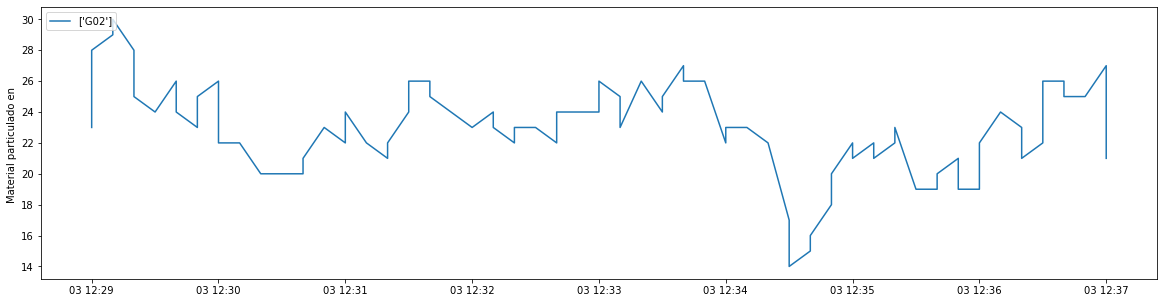

03072022
La version es plaza en la letra a, con la participacion de los sensores ['G05', 'G10']


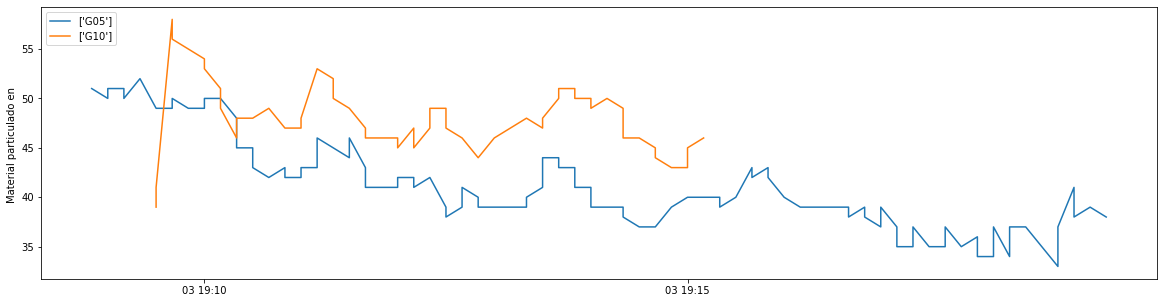

La version es escuela en la letra a, con la participacion de los sensores ['G02', 'G08', 'G07']


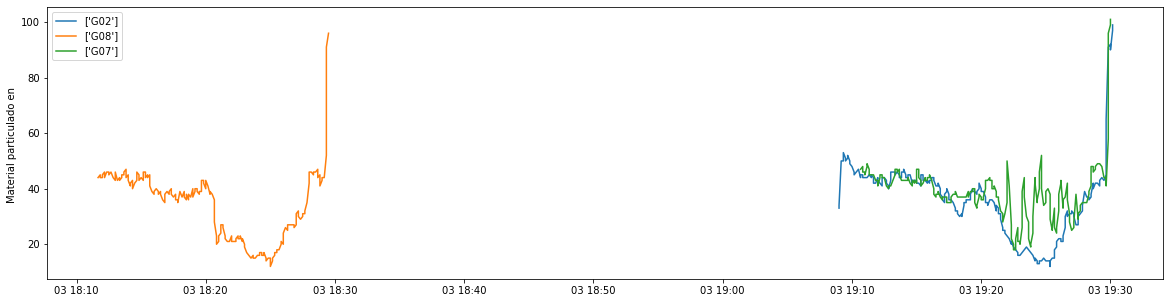

La version es Plaza de armas en la letra a, con la participacion de los sensores ['G06']


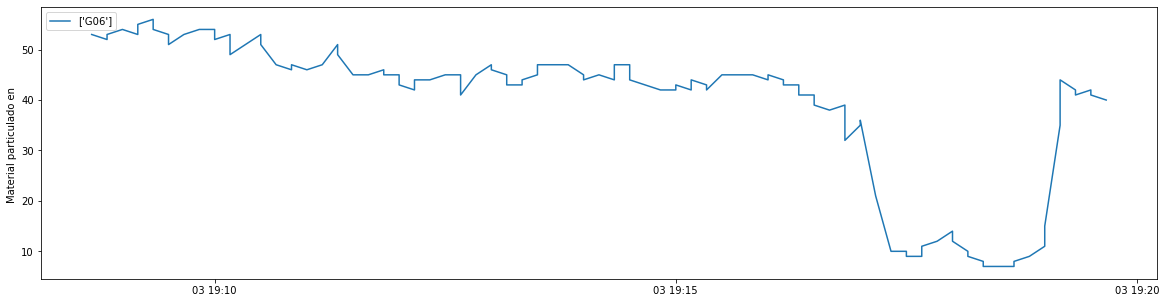

04072022
La version es plaza en la letra c, con la participacion de los sensores ['G02', 'G10', 'G07', 'G05', 'F01']


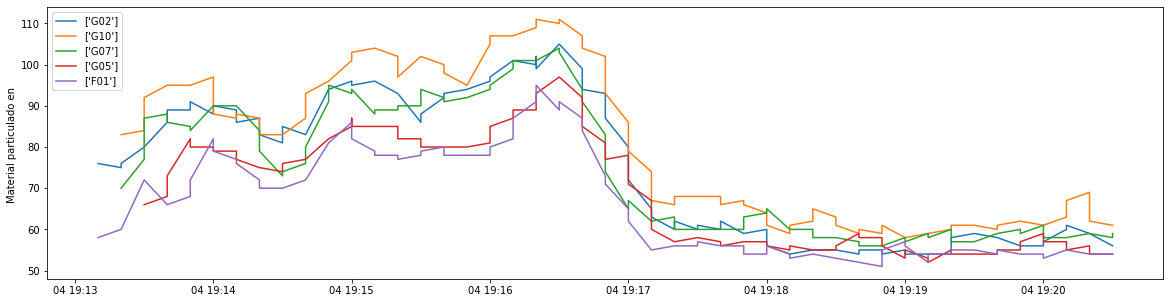

La version es plaza en la letra a, con la participacion de los sensores ['G07', 'G05', 'G08']


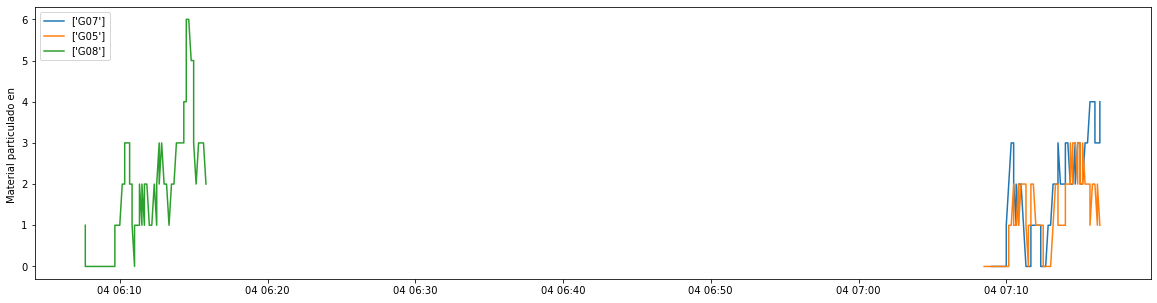

La version es plaza en la letra B, con la participacion de los sensores ['G05']


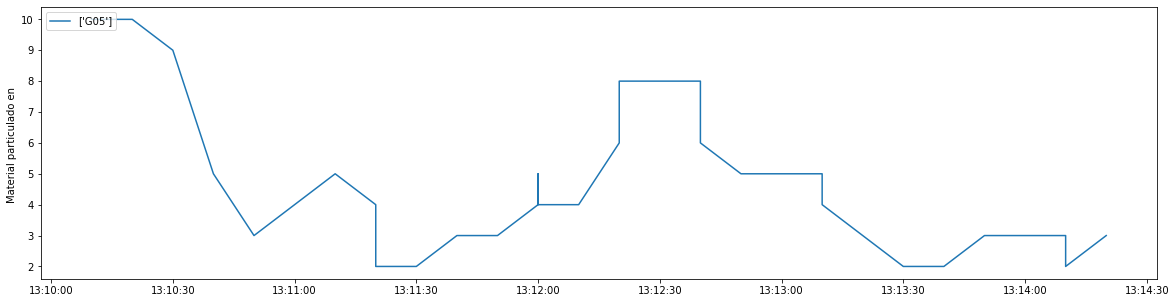

La version es plaza en la letra b, con la participacion de los sensores ['G06', 'F04', 'G02']


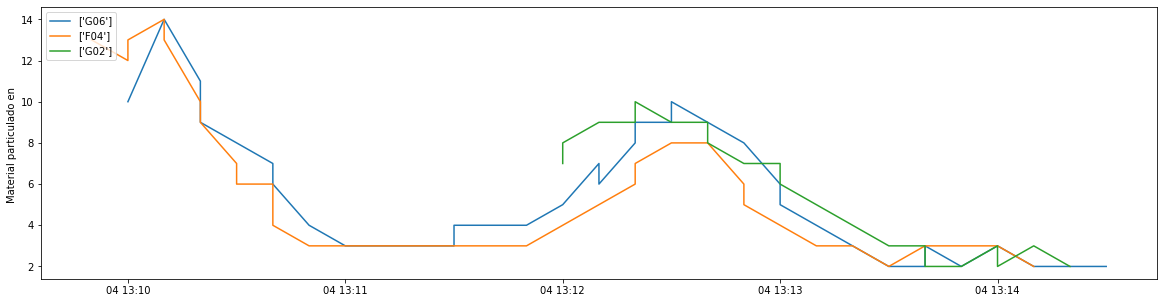

29072022
La version es prueb en la letra b, con la participacion de los sensores ['F02']


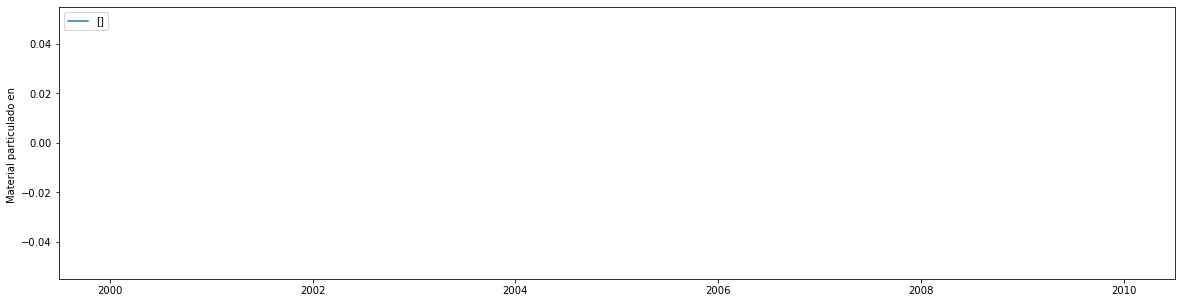

La version es op en la letra hb, con la participacion de los sensores ['G09']


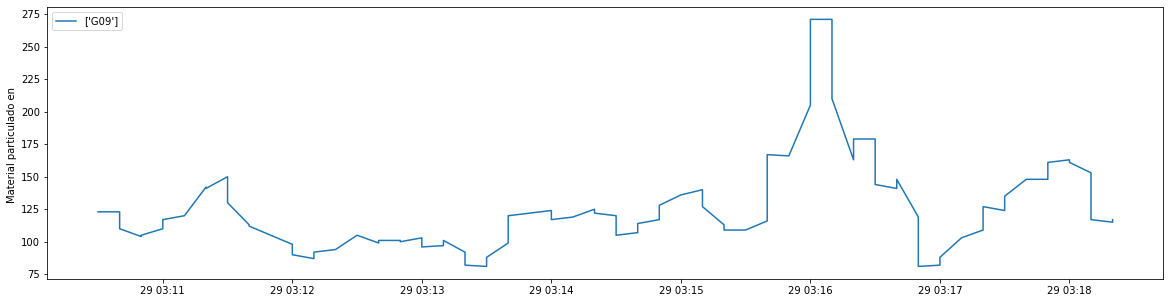

26072022
La version es mega en la letra c, con la participacion de los sensores ['F04', 'G03', 'G07', 'F01']


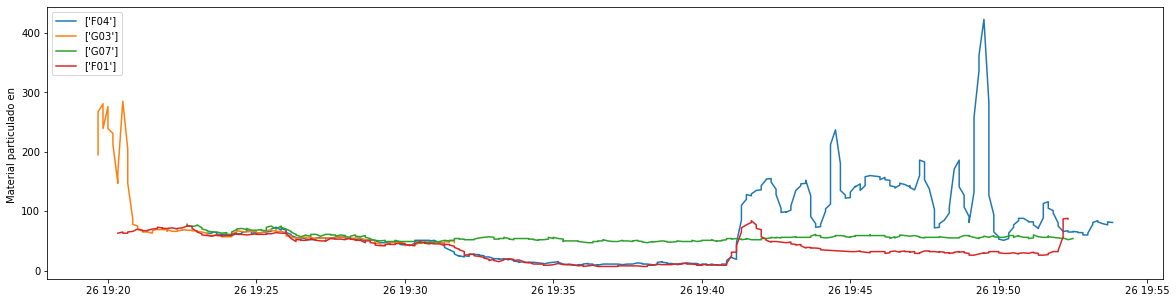

29062022
La version es mega en la letra a, con la participacion de los sensores ['F02']


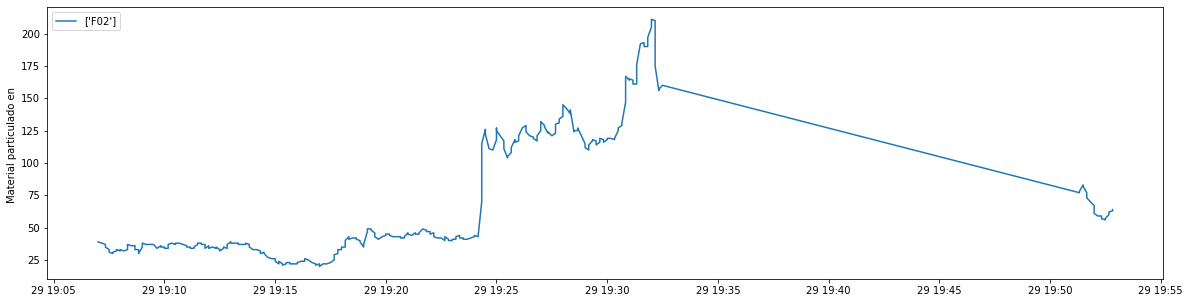

La version es plaza en la letra b, con la participacion de los sensores ['F02']


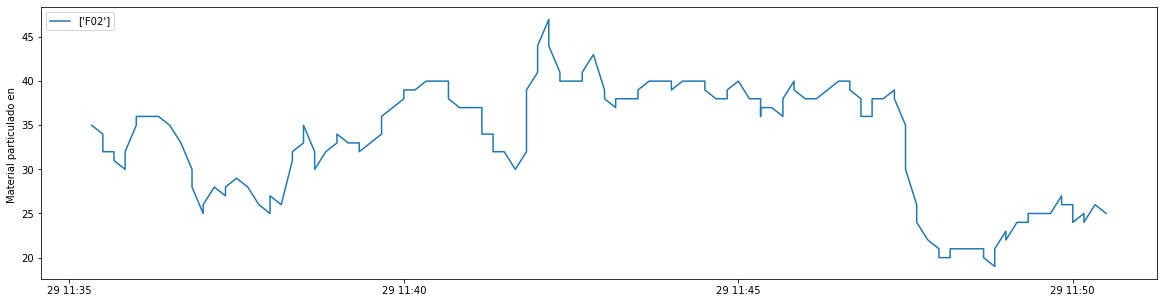

La version es plaza en la letra C, con la participacion de los sensores ['F02']


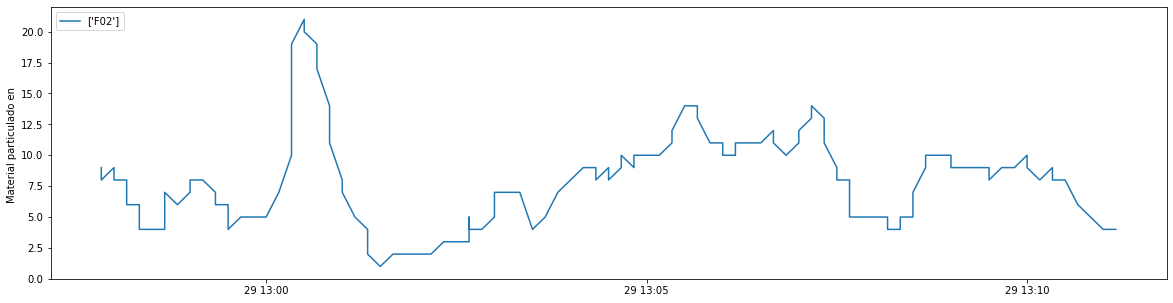

06082022
La version es plaza en la letra b, con la participacion de los sensores ['G03']


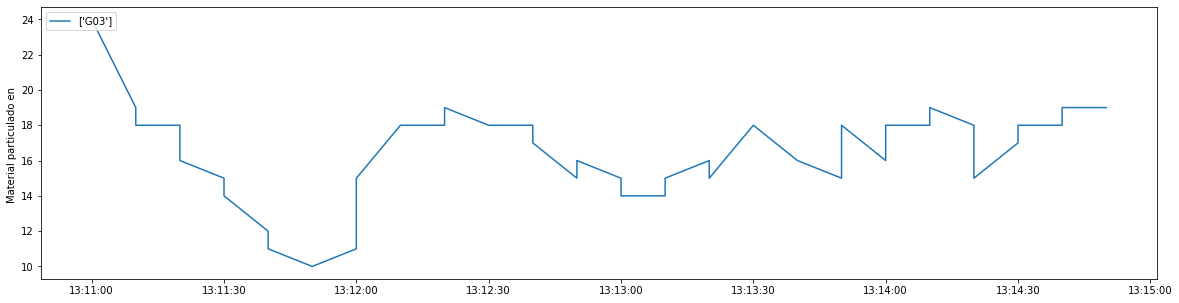

30072022
La version es plaza en la letra b, con la participacion de los sensores ['G01']


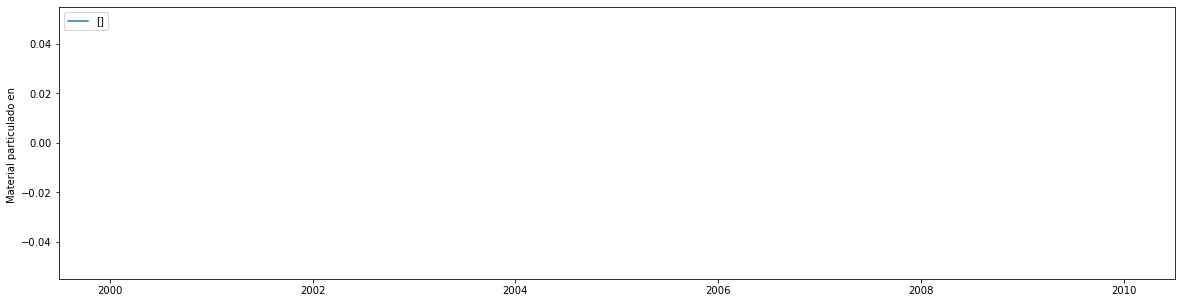

La version es Plaza en la letra c, con la participacion de los sensores ['G01']


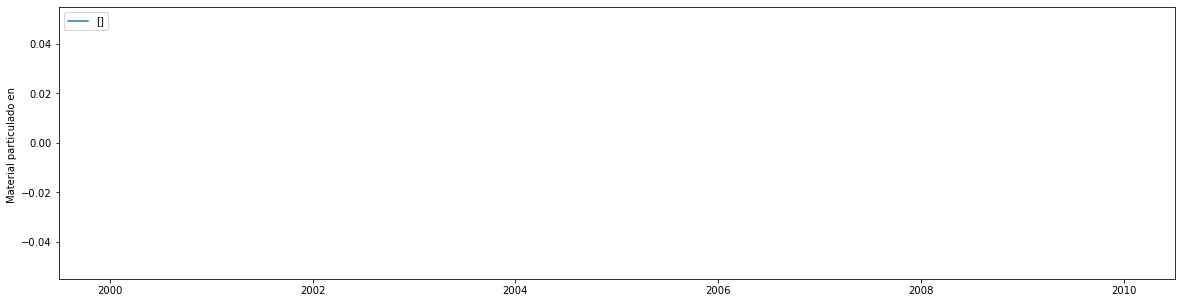

La version es mega en la letra a, con la participacion de los sensores ['G01']


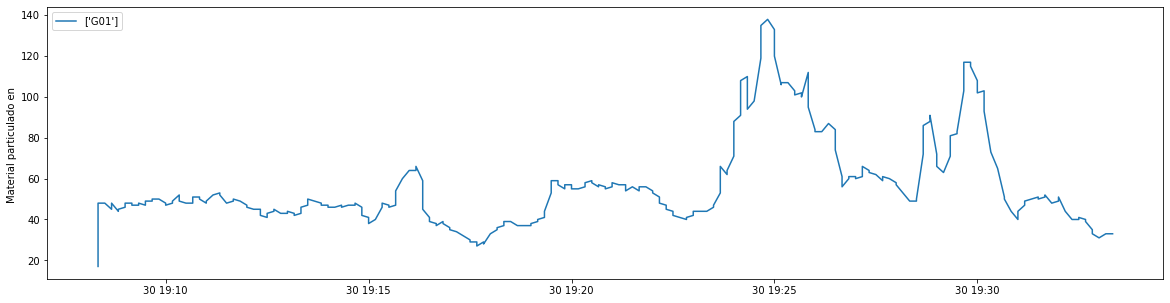

01072022
La version es escuela en la letra a, con la participacion de los sensores ['G06', 'G09', 'G10']


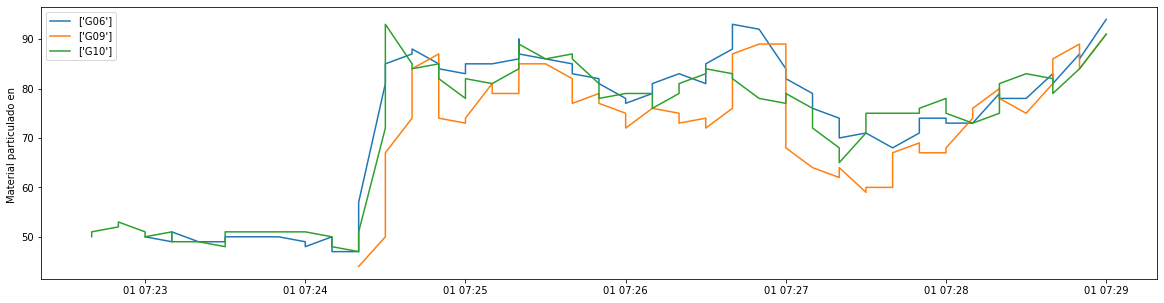

La version es escuela en la letra b, con la participacion de los sensores ['G06', 'G09']


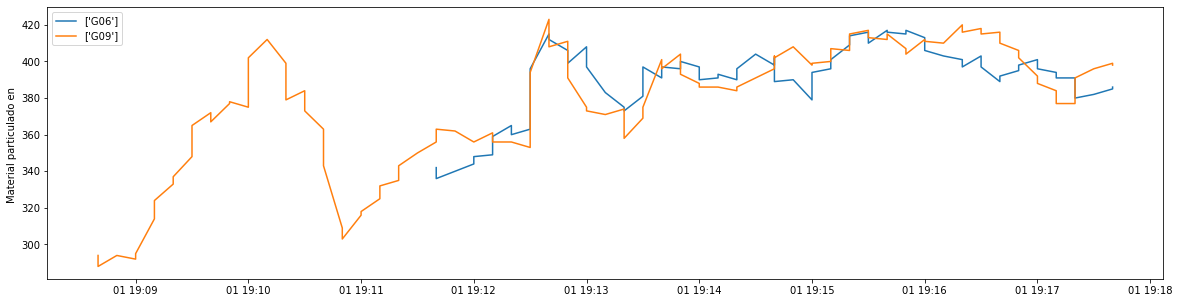

La version es plaza en la letra c, con la participacion de los sensores ['G08', 'G05', 'G10']


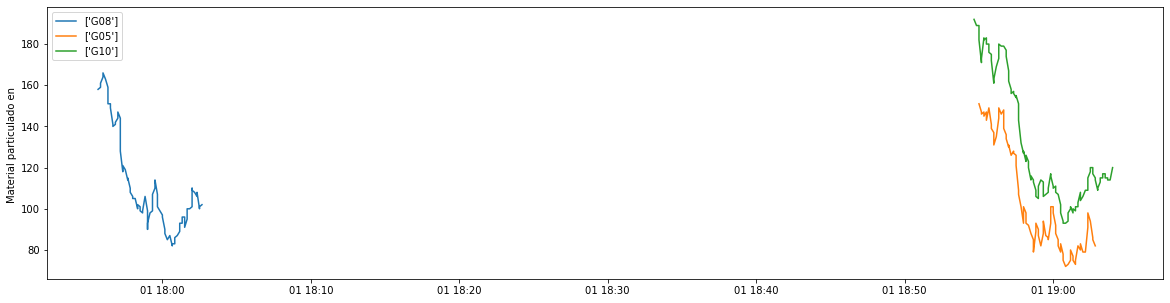

La version es plaza en la letra C, con la participacion de los sensores ['F01']


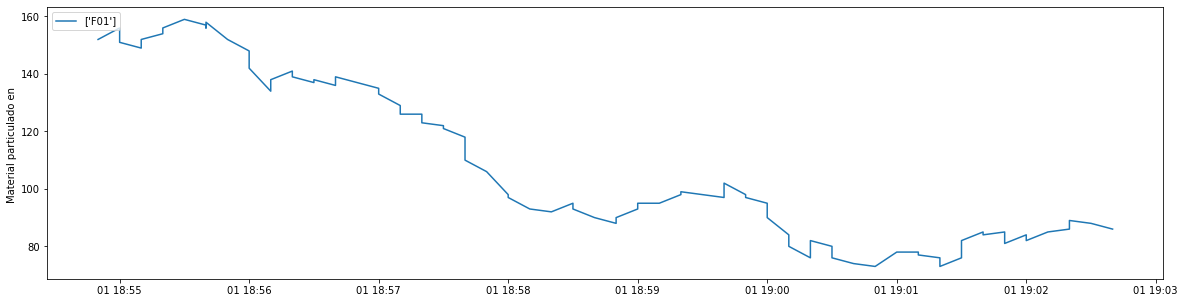

27072022
La version es auto en la letra a, con la participacion de los sensores ['G03', 'F01']


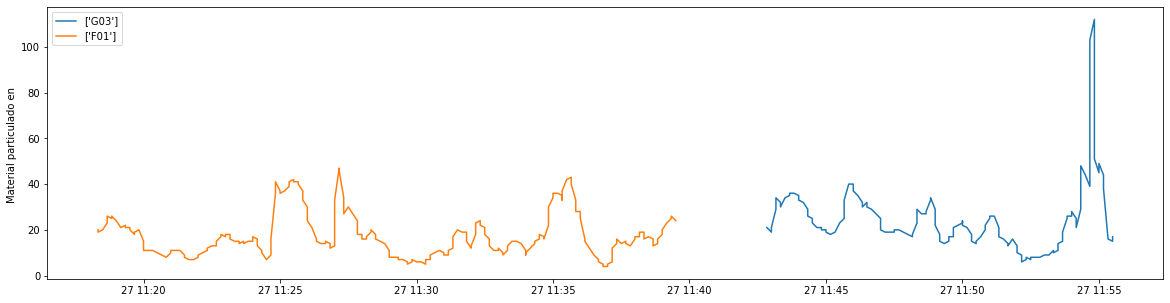

08072022
La version es Coihaique en la letra 1, con la participacion de los sensores ['G05']


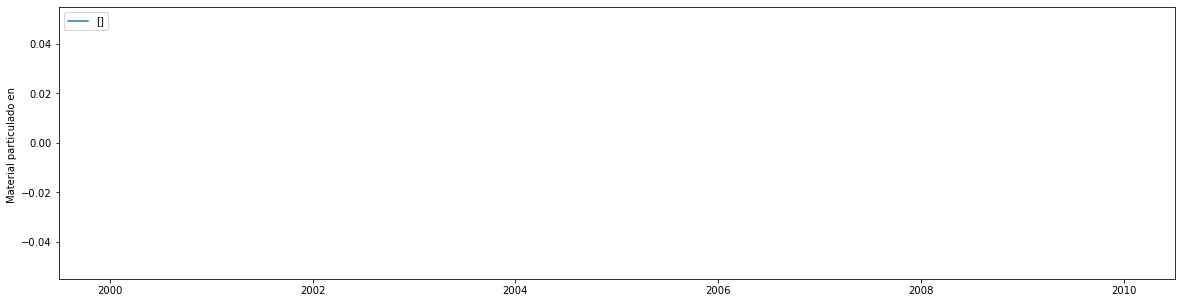

La version es Coihaique en la letra 2, con la participacion de los sensores ['G05']


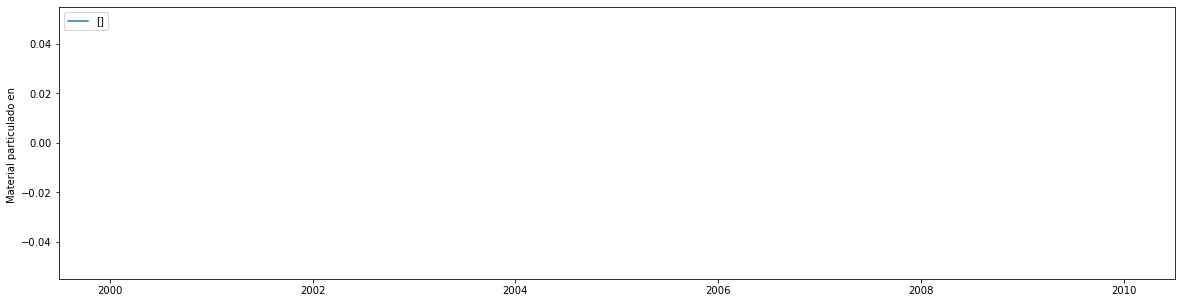

02012015
La version es quintero en la letra b, con la participacion de los sensores ['G05']


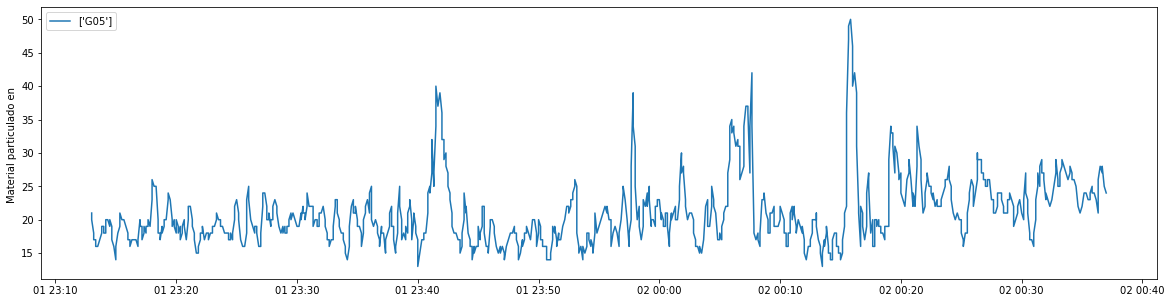

16082022
La version es quinteri en la letra z, con la participacion de los sensores ['F01']


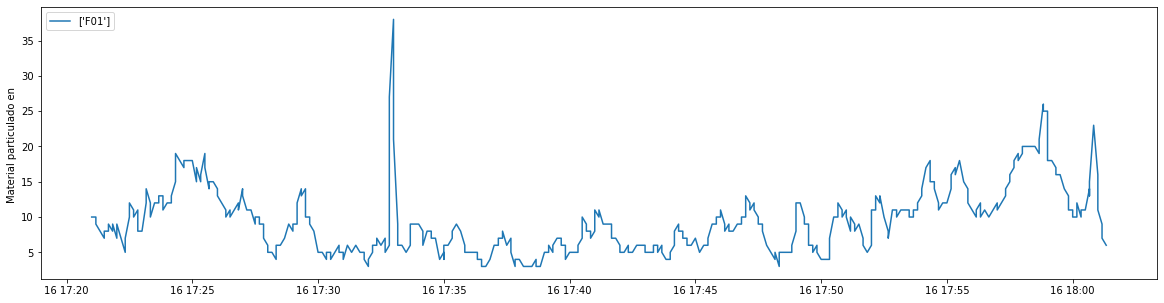

La version es quintwro en la letra j, con la participacion de los sensores ['F01']


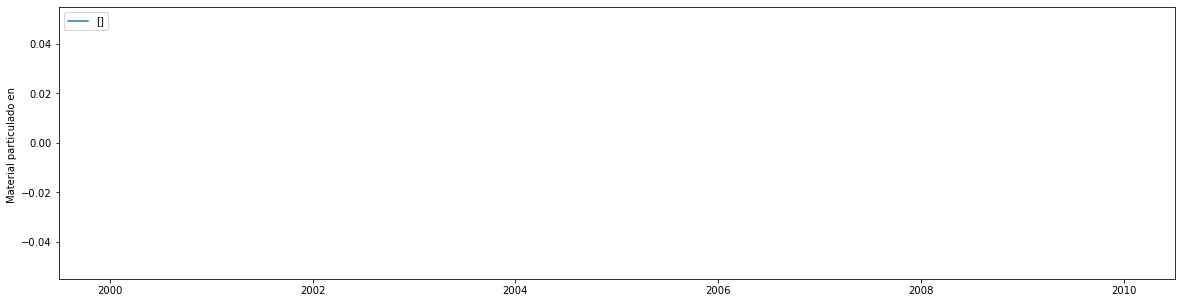

01012015
La version es quintero2 en la letra a, con la participacion de los sensores ['G05']


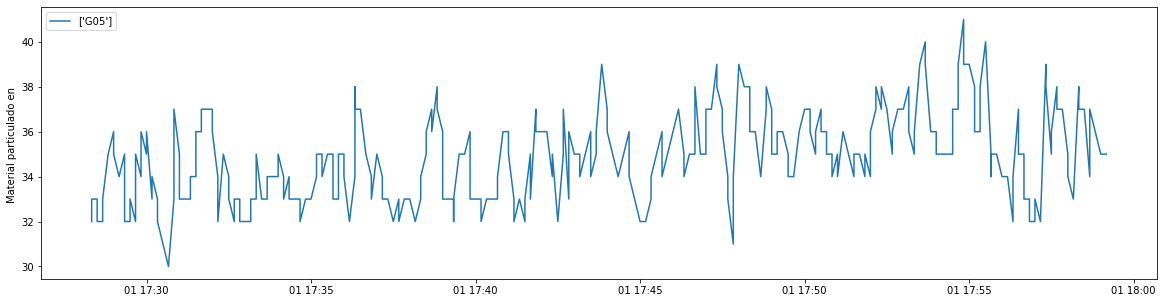

La version es quintero  en la letra b, con la participacion de los sensores ['G05']


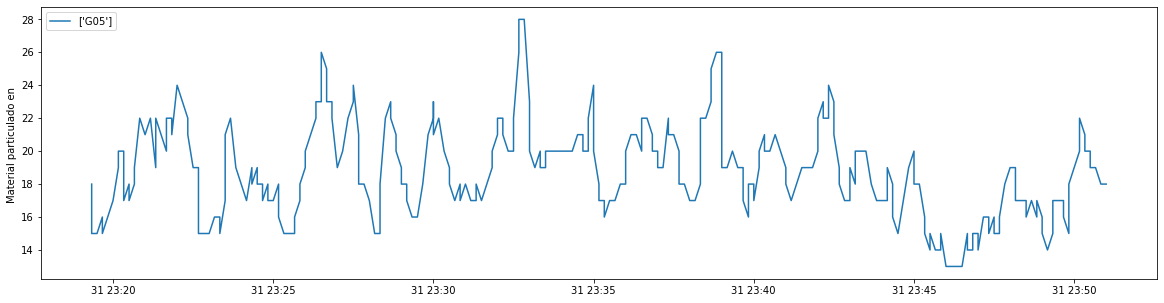

09072022
La version es Coihaique en la letra 1, con la participacion de los sensores ['G05']


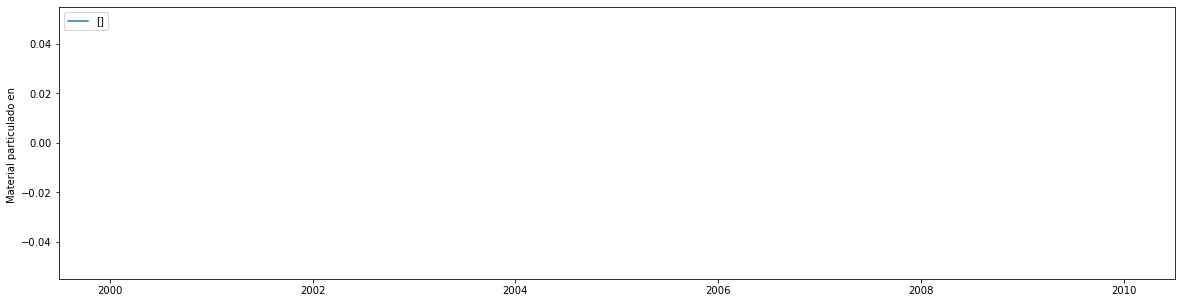

In [13]:
data = tiempo(data)
dfs_dates = df_to_dict(data)
registro(dfs_dates)
graficar(dfs_dates)
#exportar(data)

In [14]:
data.to_csv(r'C:\Users\vicen\Desktop\data.csv', sep=',', encoding='utf-8', header='true', index = None)